### K-nearest Neighbours Classification

In [1]:
from __future__ import print_function

import numpy as np
from sklearn import datasets, neighbors, linear_model, tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

C:\Users\sudip\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Prepare DataSet (Iris Dataset)

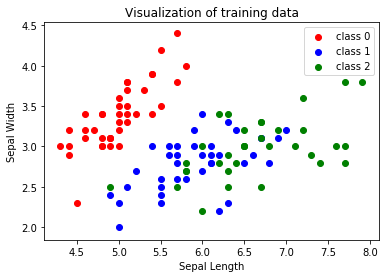

In [2]:
iris = load_iris()
X = iris.data[:,:2] #Only first two input-features (Sepal length & Width)
Y = iris.target

nsamp = len(Y)

#Splitting into training and test sets
random_indices = np.random.permutation(nsamp)

num_training_samples = int(nsamp*0.75)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]

x_test = X[random_indices[num_training_samples:]]
y_test = Y[random_indices[num_training_samples:]]

#Visualizing the training data
X_class0 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==0])
Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int)
X_class1 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==1])
Y_class1 = np.ones((X_class1.shape[0]),dtype=np.int)
X_class2 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==2])
Y_class2 = np.full((X_class2.shape[0]),fill_value=2,dtype=np.int)

plt.scatter([X_class0[:,0]], [X_class0[:,1]],color='red')
plt.scatter([X_class1[:,0]], [X_class1[:,1]],color='blue')
plt.scatter([X_class2[:,0]], [X_class2[:,1]],color='green')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(['class 0','class 1','class 2'])
plt.title('Visualization of training data')
plt.show()

### K-nearest neighbour classifier algorithm
#### The K-nearest neighbor is a non-parametric learning algorithm and does not learn an parameterized function that maps the input to the output.
#### Classify a quary point:
#### ==> finds out the K nearest neighbors of the query point ==> The class corresponding to majority of the points is output as the class of the query point.

In [3]:
model = neighbors.KNeighborsClassifier(n_neighbors = 10) # K = 5
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [4]:
x_test[10], y_test[10]

(array([6.3, 3.3]), 2)

In [5]:
query_point = np.array([6.0,3.2])
true_class_of_query_point = 1
predicted_class_for_query_point = model.predict([query_point])
print("Query point: {}".format(query_point))
print("True class of query point: {}".format(true_class_of_query_point))
print("True class of query point: {}".format(predicted_class_for_query_point))

Query point: [6.  3.2]
True class of query point: 1
True class of query point: [1]


The query point is: [6.  3.2]

The nearest neighbors of the query point are:
 [[5.9 3.2]
 [6.  3.4]
 [6.  3. ]
 [6.1 3. ]
 [5.9 3. ]
 [6.2 3.4]
 [6.  2.9]
 [6.3 3.3]
 [6.1 2.9]
 [6.3 3.4]]

The classes of the nearest neighbors are: [1 1 2 1 1 2 1 1 1 2]

Predicted class for query point: 1


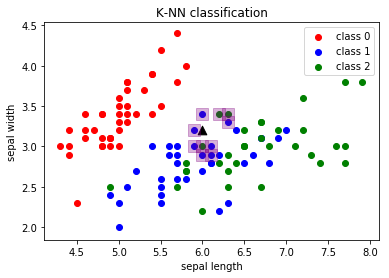

In [6]:
neighbors_object = neighbors.NearestNeighbors(n_neighbors=10)
neighbors_object.fit(x_train)
distances_of_nearest_neighbors, indices_of_nearest_neighbors_of_query_point = neighbors_object.kneighbors([query_point])
nearest_neighbors_of_query_point = x_train[indices_of_nearest_neighbors_of_query_point[0]]
print("The query point is: {}\n".format(query_point))
print("The nearest neighbors of the query point are:\n {}\n".format(nearest_neighbors_of_query_point))
print("The classes of the nearest neighbors are: {}\n".format(y_train[indices_of_nearest_neighbors_of_query_point[0]]))
print("Predicted class for query point: {}".format(predicted_class_for_query_point[0]))

plt.scatter([X_class0[:,0]], [X_class0[:,1]],color='red')
plt.scatter([X_class1[:,0]], [X_class1[:,1]],color='blue')
plt.scatter([X_class2[:,0]], [X_class2[:,1]],color='green')
plt.scatter([query_point[0]], [query_point[1]],marker='^',s=75,color='black')
plt.scatter(nearest_neighbors_of_query_point[:,0], nearest_neighbors_of_query_point[:,1],marker='s',s=150,color='purple',alpha=0.30)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1','class 2'])
plt.title('K-NN classification')
plt.show()

In [7]:
def evaluate_performance(model, x_test, y_test):
    test_set_predictions = [model.predict(x_test[i].reshape((1,len(x_test[i]))))[0] for i in range(x_test.shape[0])]
    test_misclassification_percentage = 0
    for i in range(len(test_set_predictions)):
        if test_set_predictions[i]!=y_test[i]:
            test_misclassification_percentage+=1
    test_misclassification_percentage *= 100/len(y_test)
    return test_misclassification_percentage

In [8]:
#Evaluate the performances on the test set
print("Evaluating K-NN classifier:")
test_err = evaluate_performance(model, x_test, y_test)
print('test misclassification percentage = {}%'.format(test_err))

Evaluating K-NN classifier:
test misclassification percentage = 23.68421052631579%
